# PLA - Perceptron Learning Algorithm

In [1]:
import numpy as np

def CriaDataSet(n=20):

    X = np.random.uniform(size=(n,2))
    y = np.array(X[:,0] > X[:,1], dtype=int)*2-1
    return X, y

In [2]:
Xtr,ytr = CriaDataSet(40)

Xtr,ytr

(array([[0.15168849, 0.85146145],
        [0.49830769, 0.96107908],
        [0.59941643, 0.18930369],
        [0.66831364, 0.64024728],
        [0.73707112, 0.25858585],
        [0.71420379, 0.48600453],
        [0.01622339, 0.54775086],
        [0.45496691, 0.85773365],
        [0.80454761, 0.48392481],
        [0.64692613, 0.55635121],
        [0.84085576, 0.05271887],
        [0.55993149, 0.39367951],
        [0.96815746, 0.2355975 ],
        [0.58572163, 0.27380018],
        [0.4133473 , 0.93882965],
        [0.30013138, 0.51087983],
        [0.26989762, 0.5519906 ],
        [0.90780762, 0.51568363],
        [0.65088174, 0.0664518 ],
        [0.62309616, 0.44931181],
        [0.02265068, 0.33321236],
        [0.43631028, 0.70589674],
        [0.90452743, 0.76831522],
        [0.36099722, 0.99664679],
        [0.21077365, 0.65894353],
        [0.56998543, 0.50522643],
        [0.04079618, 0.72260307],
        [0.27098444, 0.90592007],
        [0.69008079, 0.21410235],
        [0.739

In [3]:
Xtr[:,0][ytr==1]

array([0.59941643, 0.66831364, 0.73707112, 0.71420379, 0.80454761,
       0.64692613, 0.84085576, 0.55993149, 0.96815746, 0.58572163,
       0.90780762, 0.65088174, 0.62309616, 0.90452743, 0.56998543,
       0.69008079, 0.73961271, 0.76541799, 0.86371118, 0.44654423,
       0.89041517, 0.75600187, 0.62503129, 0.7080115 , 0.3164672 ])

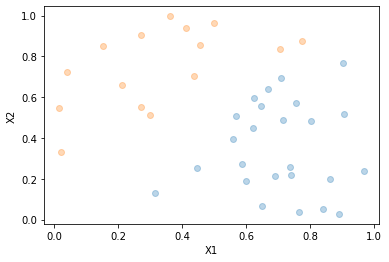

In [4]:
import matplotlib.pyplot as plt

def plotDataSet(X,y):
    plt.xlabel('X1')
    plt.ylabel('X2')
    
    for k in set(y):
        #print("k=",k)
        plt.plot(X[:,0][y==k],
                 X[:,1][y==k],
                 "o",alpha=0.3)

plotDataSet(Xtr, ytr)
plt.show()

In [5]:
def plotHiperplano(X,y,vetor, intercept=0):
    x0min = min(X[:,0])
    x0max = max(X[:,0])
    
    xs = np.linspace(x0min, x0max, num=2)
    #separador do hiperplano entre duas classificações pode ser 
    #encontrada conforme calculo abaixo:
    ys = (-vetor[0]/vetor[1])*xs-intercept/vetor[1]
    plt.plot(xs,ys)

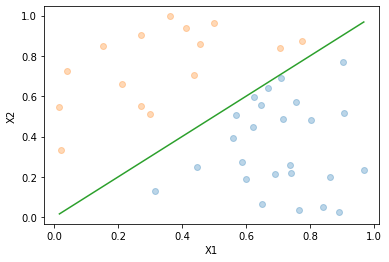

In [6]:
plotDataSet(Xtr,ytr)
plotHiperplano(Xtr,ytr,[1,-1])
plt.show()

cada x é um ponto x,y
exemplo: x = [0.8, 0.3]
usando peso w:
w = [1,-1]
0.8 -0.3 -> 0.5


o que o perceptron faz é encontrar o ponto de separação, ou seja, definir o w do peso usado que corresponda aos dados.



### Definindo um Perceptron

Buscando implementar um perceptron capaz de detectar a reta conforme o exemplo anterior.

Sabe-se que ele encontra uma solução quando a base é linearmente separável. Fica buscando uma solução ate encontrar (while True) ou até um limite definido (max_iter).

1.0


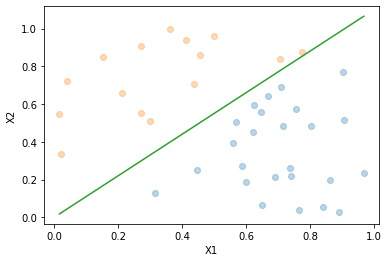

In [16]:
from sklearn.base import BaseEstimator, ClassifierMixin
import random

class Perceptron(BaseEstimator, ClassifierMixin):
    def __init__(self, max_iter=100):
        #roubou: colocou forçado -1 e 1 já sabendo que é a solução da base proposta utilizada
        #self.w = np.array([1,-1])
        self.w = None
        
        #função de ativação que retorna 1 ou -1 conforme valor de a
        self.activation = lambda a: (a>0)*2-1
        
        #numero maximo de iterações que irá tentar
        self.max_iter = max_iter

        #Custos encontrados em cada iteração de treinamento.
        self.custos = []
        
    def predict(self, X,y=None):
        #a é um vetor de escalares que será o equivalente ao w dos pesos
        #a = X @ self.w
        a = X @ self.w #calcula X[0]*w[0] + X[1]*w[1] para cada registro de X e retorna o vetor final.

        ypred = self.activation(a)
        return ypred
    
    def fit(self, X, y):
        '''
        Treinamento ONLINE do perceptron.
        '''
        self.w = np.random.uniform(-1,1,size=X.shape[1])
        #é comprovado que o perceptron pode ficar em loop caso
        #a sequencia das amostras lidas seja na mesma ordem.
        #para garantir que ele nao fique em loop, vamos criar uma lista
        #de indices para buscar aleatoriamente a cada rodada
        
        # a cada rodada misturar os itens
        indexes = list(range(X.shape[0]))
        self.custos = []
        for j in range(self.max_iter):
            any_error = False
            #forma online de identificar o custo, uma a um
            erros = []
            for i in sorted(indexes, key=lambda k: random.random()):
                x = X[i,:]
                ypred = self.predict(x)
                
                #calculo que o perceptron faz para achar o erro
                erro = y[i] - ypred #-1 + 1 = 0# se 1 + 1 = 2#-1-1=-2, logo o erro é sempre 0, -2 ou +2
                erros.append(erro**2)
                if erro != 0:
                    any_error = True
                
                #atualiza todo o vetor w se erro encontrado
                self.w += erro*x
            
            #verificando a interação para avaliar quando converge
            #print(j)
            self.custos.append(sum(erros))
            #print('custo%d=%.2f' % (i, custo))

            #só para se não encontrar nenhum erro
            if not any_error:
                break
    
    def fit2(self, X, y):
        '''
        Treinamento em BATCH do perceptron.
        '''

        self.w = np.random.uniform(-1,1,size=X.shape[1])
        #é comprovado que o perceptron pode ficar em loop caso
        #a sequencia das amostras lidas seja na mesma ordem.
        #para garantir que ele nao fique em loop, vamos criar uma lista
        #de indices para buscar aleatoriamente a cada rodada
        
        self.custos = []

        # a cada rodada misturar os itens
        indexes = list(range(X.shape[0]))
        for j in range(self.max_iter):
            
            #verificando quando converge
            #print(j)
            
            #versao em batch, tudo de uma vez, todo o vetor ao inves de um a um
            ypred = self.predict(X)
            erros = y-ypred

            custo = sum(erros**2)
            self.custos.append(custo)
            if custo == 0:
                break
            self.w += X.T @ erros # o erro corrige os pesos, mas o custo não entra nesse ajuste

    def PlotCusto(self, tipo):
        '''
        Plotando o gráfico de iterações x custo para aprendizado.
        '''
        if (len(self.custos) == 0):
            print('ERRO: Modelo ainda não treinado para avaliar o custo!')
            return
        
        x = [i for i in range(1,len(self.custos) + 1)]

        plt.xlabel('Nº Iterações')
        plt.ylabel('Custo ' + tipo)
        plt.plot(x, self.custos, "o")
        plt.show()

perceptron = Perceptron()
#perceptron.fit(Xtr,ytr)
perceptron.fit2(Xtr,ytr)
ypred = perceptron.predict(Xtr)
#comparando quantos são iguais e divide pelo tamanho: resultado é a acuracia
print(sum(ypred==ytr)/len(ytr))
plotDataSet(Xtr, ytr)
plotHiperplano(Xtr,ytr,perceptron.w)
plt.show()

## Iterações x Custo: ONLINE e BATCH

Faça um Jupyter Notebook com gráficos comparando a redução do custo em duas implementações diferentes do perceptron:

com o treinamento online, isto é, o ajustes dos pesos usa o erro de 1 exemplo e cada vez;
com o treinamento em batch, quando usa-se todos os exemplos da base de dados simultaneamente para estimar o erro e ajustar os pesos.
Escreva um parágrafo explicando as diferenças e o motivo do comportamento de cada implementação.

### ONLINE

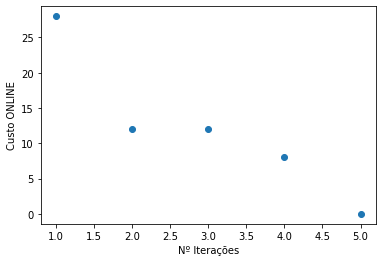

In [17]:
percepONLINE = Perceptron()
percepONLINE.fit(Xtr,ytr)
percepONLINE.PlotCusto('ONLINE')

### BATCH

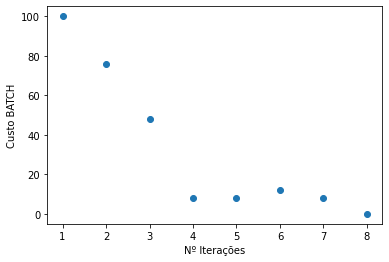

In [18]:
percepBATCH = Perceptron()
percepBATCH.fit2(Xtr,ytr)
percepBATCH.PlotCusto('BATCH')

#### Avaliando os resultados

A cada execução o número de iterações para convergência em ambas abordagens varia. Isso implica que o gráfico nem sempre mostrará perceptivelmente os pontos e a tendência de ajuste dos pesos pretendidos. Após executar diversas vezes, é possível notarmos que há uma tendência de diminuição do custo, pois o erro é rapassado ao peso para a iteração seguinte, promovendo uma tendência de minimização dele. Em ambas abordagens esse comportamento ocorre.

A questão a ser observada, então, está relacionada aos cenários em que pode-se aplicar uma ou outra abordagem.

Na abordagem em Batch é interessante observar que todos os dados estão sendo tratados de uma única vez. Quando temos poucos dados (cabíveis na memória) pode ser adequada e mais rápida. Porém, quando os dados se tornam muito grandes que não cabem na memória temos um problema. Esse problema é resolvido com a abordagem Online, pois temos a liberadade de processar os dados com um melhor uso de memória, já que não precisamos alocar todos os dados de uma única vez.

Uma possibilidade que surge como consequência da abordagem online é que podemos treinar o modelo ao longo do tempo à medida que novos dados são disponibilizados de diversas fontes. Ou seja, não precisamos ter todos dados a priori já carregados na base. Dependendo da necessidade, seria possível inciar o treinamento com os primeiros dados e continuar carregando à medida que novos dados de treinamento ainda vão sendo disponibilizados.